# Mar.io

## 1. On importe les bibliothèques

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## 2. On charge le dataset depuis Kaggle

In [136]:
data = pd.read_csv(r'C:\Users\Aerlaw\Documents\Cours et TP Bachelor\IA\primary_data.csv', sep=';')
data.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


## 3. Prétraitement des données

### On convertie en binaire les étiquettes

In [140]:
data['class'] = data['class'].map({'e': 0, 'p': 1})

### On sépare les caractéristiques et les étiquettes

In [143]:
X = data.drop(columns=['class', 'name'])
y = data['class']

### On transforme les variables catégorielles en variables numériques

In [146]:
X = pd.get_dummies(X)

### On convertie les booléens en int

In [149]:
X = X.astype(int)

### On normalise les caractéristiques

In [152]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Séparation des données en ensembles d'entraînement et de validation

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Construction du modèle

In [178]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

### On le compile

In [181]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Le résumé

In [184]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │        63,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,985 (289.00 KB)

 Trainable params: 73,985 (289.00 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Entraînement du modèle

### Callback/early_stopping

In [188]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8575 - loss: 0.5663 - val_accuracy: 0.5429 - val_loss: 0.8196
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9174 - loss: 0.5226 - val_accuracy: 0.5429 - val_loss: 0.8285
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9214 - loss: 0.4976 - val_accuracy: 0.5429 - val_loss: 0.8674
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9325 - loss: 0.4168 - val_accuracy: 0.5714 - val_loss: 0.8729
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9784 - loss: 0.3589 - val_accuracy: 0.6000 - val_loss: 0.8894
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9963 - loss: 0.3171 - val_accuracy: 0.5714 - val_loss: 0.9450
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9858 - loss: 0.2768 - val_accuracy: 0.5714 - val_loss: 1.0280
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9882 - loss: 0.2774 - val_accuracy: 0.5429 - val_loss: 1.1055


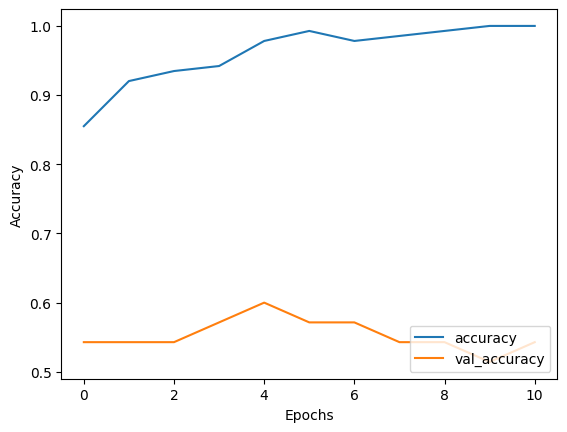

In [209]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## 6. Evaluation du modèle

In [173]:
y_pred = (model.predict(X_val) > 0.5).astype("int32")

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A66A303100> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


### Calcul des métriques

In [176]:
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[ 3 14]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.18      0.30        17
           1       0.56      1.00      0.72        18

    accuracy                           0.60        35
   macro avg       0.78      0.59      0.51        35
weighted avg       0.78      0.60      0.52        35



## 7. On réajuste le modèle

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [194]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

### On le compile

In [197]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### On définie l'arrêt anticipé

In [200]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### On entraîne le modèle avec l'early stopping

In [207]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

model.save('mushroom_classifier_model.keras')

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9766 - loss: 0.5183 - val_accuracy: 0.6429 - val_loss: 0.8477
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9376 - loss: 0.5077 - val_accuracy: 0.6071 - val_loss: 0.8595
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9469 - loss: 0.4527 - val_accuracy: 0.6786 - val_loss: 0.8754
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9703 - loss: 0.4053 - val_accuracy: 0.7143 - val_loss: 0.8985
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9943 - loss: 0.3753 - val_accuracy: 0.7500 - val_loss: 0.9334
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.3044 - val_accuracy: 0.7500 - val_loss: 0.9676
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9761 - loss: 0.2937 - val_accuracy: 0.7500 - val_loss: 1.0031
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.2807 - val_accuracy: 0.7143 - val_loss:

### 8. On continue de tester des modèles

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

# Enregistrer le modèle au format .keras
model.save('mushroom_classifier_model.keras')

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5713 - loss: 2.2264 - val_accuracy: 0.6071 - val_loss: 2.1124
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5608 - loss: 2.1168 - val_accuracy: 0.6071 - val_loss: 2.0035
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5702 - loss: 1.9946 - val_accuracy: 0.6071 - val_loss: 1.9061
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5728 - loss: 1.8927 - val_accuracy: 0.5357 - val_loss: 1.8161
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5536 - loss: 1.8035 - val_accuracy: 0.5714 - val_loss: 1.7343
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6035 - loss: 1.7231 - val_accuracy: 0.5714 - val_loss: 1.6591
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6473 - loss: 1.6403 - val_accuracy: 0.5714 - val_loss: 1.5894
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6530 - loss: 1.5448 - val_accuracy: 0.5714 - val_loss:

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.5156 - loss: 4.2113 - val_accuracy: 0.5000 - val_loss: 3.8425 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5219 - loss: 4.0424 - val_accuracy: 0.4286 - val_loss: 3.7156 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6061 - loss: 3.7358 - val_accuracy: 0.5000 - val_loss: 3.6037 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5718 - loss: 3.7612 - val_accuracy: 0.5000 - val_loss: 3.5037 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6566 - loss: 3.4528 - val_accuracy: 0.5357 - val_loss: 3.4132 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5884 - loss: 3.5183 - val_accuracy: 0.5714 - val_loss: 3.3319 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6160 - loss: 3.3192 - val_accuracy: 

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.5973 - loss: 2.7054 - val_accuracy: 0.4286 - val_loss: 2.3891 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5015 - loss: 2.7727 - val_accuracy: 0.3929 - val_loss: 2.3231 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5541 - loss: 2.6318 - val_accuracy: 0.5000 - val_loss: 2.2638 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5224 - loss: 2.6071 - val_accuracy: 0.5357 - val_loss: 2.2105 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6207 - loss: 2.4471 - val_accuracy: 0.5357 - val_loss: 2.1641 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4922 - loss: 2.5163 - val_accuracy: 0.5714 - val_loss: 2.1235 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5547 - loss: 2.3813 - val_accuracy: 

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.6),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.6),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.5323 - loss: 1.9180 - val_accuracy: 0.6786 - val_loss: 1.5475 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5188 - loss: 1.7415 - val_accuracy: 0.5714 - val_loss: 1.5160 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4568 - loss: 1.8722 - val_accuracy: 0.5714 - val_loss: 1.4871 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4797 - loss: 1.7826 - val_accuracy: 0.6071 - val_loss: 1.4616 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4859 - loss: 1.7141 - val_accuracy: 0.6071 - val_loss: 1.4393 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4813 - loss: 1.7579 - val_accuracy: 0.5714 - val_loss: 1.4187 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5088 - loss: 1.6348 - val_accuracy:

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Définition du modèle ajusté
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4547 - loss: 3.0659 - val_accuracy: 0.6071 - val_loss: 2.3692 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5484 - loss: 2.5876 - val_accuracy: 0.6071 - val_loss: 2.2989 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4818 - loss: 2.5883 - val_accuracy: 0.6429 - val_loss: 2.2369 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4750 - loss: 2.6079 - val_accuracy: 0.6429 - val_loss: 2.1839 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5645 - loss: 2.4118 - val_accuracy: 0.6786 - val_loss: 2.1368 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4620 - loss: 2.4356 - val_accuracy: 0.6786 - val_loss: 2.0943 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5526 - loss: 2.3048 - val_accuracy: 

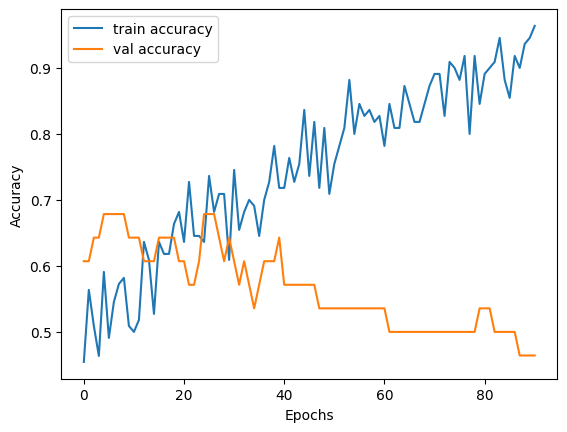

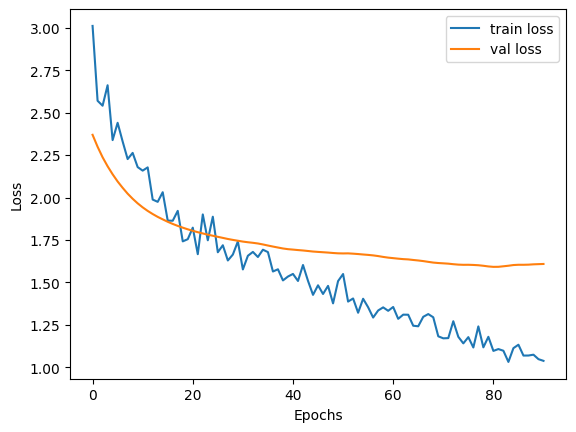

In [48]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Définition du modèle ajusté
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4218 - loss: 2.8539 - val_accuracy: 0.6071 - val_loss: 2.3140 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4362 - loss: 2.5806 - val_accuracy: 0.5714 - val_loss: 2.2114 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5467 - loss: 2.3965 - val_accuracy: 0.5714 - val_loss: 2.1284 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5677 - loss: 2.3391 - val_accuracy: 0.6071 - val_loss: 2.0600 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5053 - loss: 2.1875 - val_accuracy: 0.6071 - val_loss: 2.0051 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5571 - loss: 2.0969 - val_accuracy: 0.6071 - val_loss: 1.9606 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5298 - loss: 2.1755 - val_accuracy: 0.6071

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Définition du modèle ajusté
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5585 - loss: 4.1038 - val_accuracy: 0.3929 - val_loss: 3.7239 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5544 - loss: 3.9039 - val_accuracy: 0.5714 - val_loss: 3.5283 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6178 - loss: 3.5550 - val_accuracy: 0.5714 - val_loss: 3.3703 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6326 - loss: 3.3959 - val_accuracy: 0.6071 - val_loss: 3.2410 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5238 - loss: 3.4082 - val_accuracy: 0.6429 - val_loss: 3.1366 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6035 - loss: 3.1797 - val_accuracy: 0.6786 - val_loss: 3.0521 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5536 - loss: 3.2645 - val_accuracy: 0.607

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Définition du modèle amélioré
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle avec un optimiseur Adam et une learning rate par défaut
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5328 - loss: 1.5479 - val_accuracy: 0.4286 - val_loss: 1.2700 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5240 - loss: 1.5517 - val_accuracy: 0.4643 - val_loss: 1.2531 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6551 - loss: 1.3704 - val_accuracy: 0.4643 - val_loss: 1.2365 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5474 - loss: 1.3594 - val_accuracy: 0.4643 - val_loss: 1.2201 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5754 - loss: 1.3291 - val_accuracy: 0.4643 - val_loss: 1.2073 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5884 - loss: 1.1970 - val_accuracy: 0.4286 - val_loss: 1.1952 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6608 - loss: 1.0856 - val_accuracy:

# On test maintenant à partir d'une image

In [53]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Charger le modèle
model = load_model('mushroom_classifier_model.h5')

# Préparer l'image pour la prédiction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normaliser les valeurs entre 0 et 1
    return img_array

# Fonction pour prédire si un champignon est toxique ou non
def predict_mushroom(img_path):
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)
    prob = prediction[0][0]
    return prob

# Chemin de l'image à prédire
img_path = r'C:\Users\Aerlaw\Pictures\IA\champignon_toxique.jpg'

# Faire une prédiction
prob = predict_mushroom(img_path)

# Afficher les résultats
print("Probabilité que le champignon soit toxique :", prob)

# Décision basée sur la probabilité
if prob > 0.5:
    print("Le modèle pense que le champignon est toxique.")
else:
    print("Le modèle pense que le champignon n'est pas toxique.")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 128, 128, 3), dtype=float32). Expected shape (None, 496), but input has incompatible shape (1, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Charger le modèle
model = load_model('mushroom_classifier_model.h5')

# Préparer l'image pour la prédiction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normaliser les valeurs entre 0 et 1
    return img_array

# Fonction pour prédire si un champignon est toxique ou non
def predict_mushroom(img_path):
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)
    prob = prediction[0][0]
    return prob

# Chemin de l'image à prédire
img_path = r'C:\Users\Aerlaw\Pictures\IA\champignon_toxique.jpg'

# Faire une prédiction
prob = predict_mushroom(img_path)

# Afficher les résultats
print("Probabilité que le champignon soit toxique :", prob)

# Décision basée sur la probabilité
if prob > 0.5:
    print("Le modèle pense que le champignon est toxique.")
else:
    print("Le modèle pense que le champignon n'est pas toxique.")

## Matrice de confusion

In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the model
model = load_model('mushroom_classifier_model.h5')

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare test data generator
test_datagen = ImageDataGenerator(rescale=0.25)

# Path to the test dataset directory
test_dir = r'C:\Users\Aerlaw\Pictures\IA'

# Define test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Make predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# True labels
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Edible', 'Toxic'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


Found 0 images belonging to 0 classes.


ValueError: Must provide at least one structure

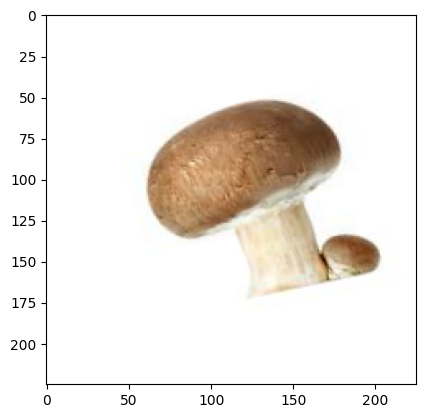

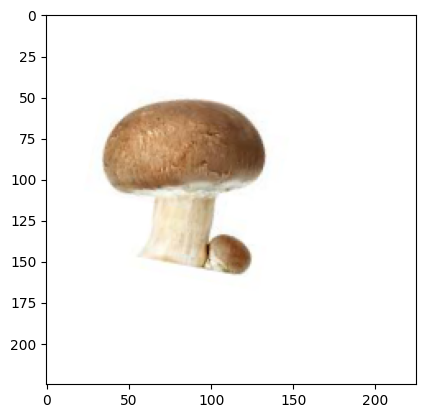

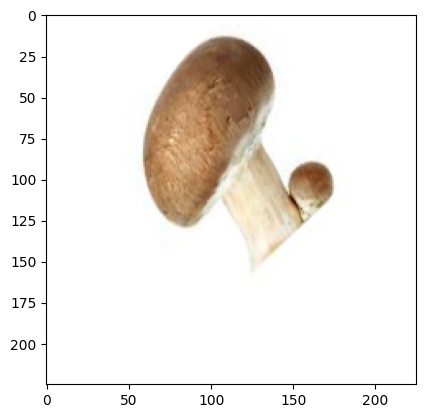

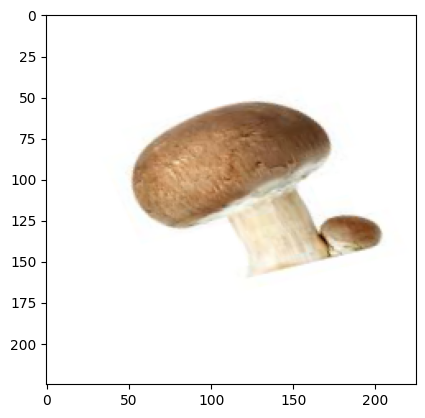

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Chemin de votre image
image_path = r'C:\Users\Aerlaw\Pictures\IA\champignon_de_paris.jpg'  # Remplacez 'your_image.jpg' par le nom de votre image

# Chargement de l'image
img = load_img(image_path)  # Charge l'image à partir du chemin donné
x = img_to_array(img)  # Convertit l'image en un tableau NumPy
x = x.reshape((1,) + x.shape)  # Reshape pour correspondre aux dimensions attendues (1, height, width, channels)

# Configuration de l'ImageDataGenerator avec quelques transformations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Création d'un générateur d'images et affichage
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))  # Convertit le tableau NumPy en image pour l'affichage
    i += 1
    if i % 4 == 0:  # Affiche 4 images générées
        break

plt.show()